In [ ]:
# import numpy as np
# import pandas as pd
# train_url = 'https://raw.githubusercontent.com/merteroglu/NSL-KDD-Network-Instrusion-Detection/master/NSL_KDD_Train.csv'


# col_names = ["duration","protocol_type","service","flag","src_bytes",
#     "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
#     "logged_in","num_compromised","root_shell","su_attempted","num_root",
#     "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
#     "is_host_login","is_guest_login","count","srv_count","serror_rate",
#     "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
#     "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
#     "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
#     "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
#     "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]


# df = pd.read_csv(train_url,header=None, names = col_names)
# df.head()

In [ ]:
#df.to_csv(r'/content/drive/MyDrive/Dataset/kdd.csv')


In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Dataset/kdd.csv')


In [ ]:
df.head()

,Unnamed: 0,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
df.isna().sum()


Unnamed: 0                     0
duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_r

In [ ]:
df['label'].value_counts()


normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64

In [ ]:
df.columns 


Index(['Unnamed: 0', 'duration', 'protocol_type', 'service', 'flag',
       'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label'],
      dtype='object')

In [ ]:
data_real = df.replace(np.inf, np.nan)


In [ ]:
data_real.isnull().sum().sum()


0

In [ ]:
data_df = data_real.dropna(axis=0)


In [ ]:
data_df.isnull().sum().sum()


0

In [ ]:
data_df.head()

,Unnamed: 0,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   125973 non-null  int64  
 1   duration                     125973 non-null  int64  
 2   protocol_type                125973 non-null  object 
 3   service                      125973 non-null  object 
 4   flag                         125973 non-null  object 
 5   src_bytes                    125973 non-null  int64  
 6   dst_bytes                    125973 non-null  int64  
 7   land                         125973 non-null  int64  
 8   wrong_fragment               125973 non-null  int64  
 9   urgent                       125973 non-null  int64  
 10  hot                          125973 non-null  int64  
 11  num_failed_logins            125973 non-null  int64  
 12  logged_in                    125973 non-null  int64  
 13 

In [ ]:
#encoding categorical columns
categorical_columns = ['protocol_type','service','flag']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_df[categorical_columns] = data_df[categorical_columns].apply(lambda col : le.fit_transform (col))
data_df.head()

,Unnamed: 0,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,0,1,20,9,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,1,0,2,44,9,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,2,0,1,49,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,3,0,1,24,9,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,4,0,1,24,9,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
data_df.replace(to_replace =["back", "buffer_overflow", "guess_passwd", "imap", "ipsweep", "land", "loadmodule", "neptune","multihop","phf","spy",
                        "nmap", "pod", "portsweep", "rootkit", "satan", "smurf", "teardrop", "warezclient", "warezmaster","perl","ftp_write"], 
                            value =1,inplace=True)
data_df.replace(to_replace =["normal"], value =0, inplace=True)
data_df.head(20)

,Unnamed: 0,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,0,1,20,9,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.00,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,1,0,2,44,9,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.00,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,2,0,1,49,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.00,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,3,0,1,24,9,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.20,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,4,0,1,24,9,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.00,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
5,5,0,1,49,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.00,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1
6,6,0,1,49,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,166,9,1.0,1.00,0.0,0.0,0.05,0.06,0.00,255,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
7,7,0,1,49,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,117,16,1.0,1.00,0.0,0.0,0.14,0.06,0.00,255,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,1
8,8,0,1,51,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,270,23,1.0,1.00,0.0,0.0,0.09,0.05,0.00,255,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
9,9,0,1,49,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,133,8,1.0,1.00,0.0,0.0,0.06,0.06,0.00,255,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1


In [ ]:
X = data_df.drop(df.columns[[-1]], axis=1)
Y = data_df[df.columns[[-1]]]

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test  =  train_test_split(X , Y , test_size = 0.1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


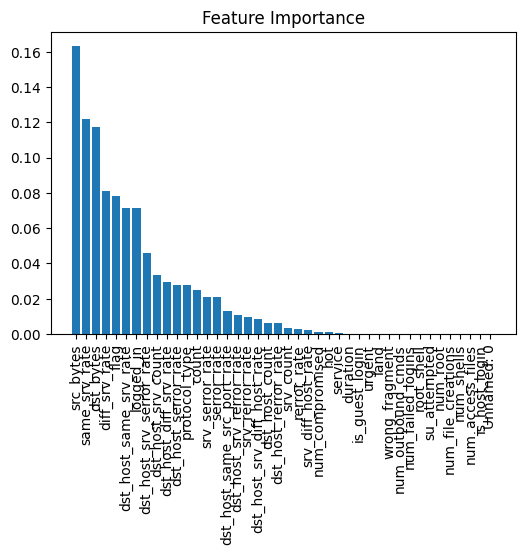

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

rf_clf = RandomForestClassifier(max_depth=2, random_state=0)
rf_clf.fit(X_train , Y_train)

importance = rf_clf.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importance)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [data_df.columns.values[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X.shape[1]), importance[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.gcf().set_dpi(100)
# Show plot
plt.show()

In [ ]:
data_df = data_df.drop(['service' , 'wrong_fragment' , 'duration' , 'is_guest_login' , 'urgent' , 'land' , 'num_outbound_cmds' , 'num_failed_logins' , 'root_shell' , 'su_attempted' , 'num_root' , 'num_file_creations' , 'num_shells' , 'num_access_files', 'is_host_login','Unnamed: 0' ] , axis=1)

In [ ]:
X = data_df.drop(df.columns[[-1]], axis=1)
Y = data_df[df.columns[[-1]]]

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test  =  train_test_split(X , Y , test_size = 0.1)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

ada_clf = AdaBoostClassifier(n_estimators=100, random_state =0).fit(X_train, Y_train)
print(ada_clf)

ada_preds = ada_clf.predict( X_test )
ada_proba = ada_clf.predict_proba(X_test)[:,1]
#print(preds)

from sklearn.metrics import accuracy_score
acs=accuracy_score( Y_test  , ada_preds)*100

print("As you can see, the accuracy of Adaboost Classifier is: "+str(acs))
print("Classification Report =\n", metrics.classification_report(Y_test, ada_preds, 
                                                                 labels=None, 
                                                                 target_names=None, 
                                                                 sample_weight=None, 
                                                                 digits=2, 
                                                                 output_dict=False))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=0)
As you can see, the accuracy of Adaboost Classifier is: 99.05540561993968
Classification Report =
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      6734
           1       0.99      0.99      0.99      5864

    accuracy                           0.99     12598
   macro avg       0.99      0.99      0.99     12598
weighted avg       0.99      0.99      0.99     12598



In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score


model = XGBClassifier()
xgb_clf = model.fit(X_train, Y_train)
print(xgb_clf)

xgb_preds = xgb_clf.predict( X_test )
xgb_proba = xgb_clf.predict_proba(X_test)[:,1]

acs=accuracy_score( Y_test  , xgb_preds)*100

print("As you can see, the accuracy of XGBoost Classifier is: "+str(acs))
print("Classification Report =\n", metrics.classification_report(Y_test, xgb_preds, 
                                                                 labels=None, 
                                                                 target_names=None, 
                                                                 sample_weight=None, 
                                                                 digits=2, 
                                                                 output_dict=False))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
As you can see, the accuracy of XGBoost Classifier is: 99.68248928401333
Classification Report =
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6734
           1       1.00      1.00      1.00      5864

    accuracy                           1.00     12598
   macro avg       1.00      1.00      1.00     12598
weighted avg       1.00      1.00      1.00     12598



In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

steps = [('pca', PCA(n_components=10)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.864 (0.002)


In [ ]:

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
steps = [('svd', TruncatedSVD(n_components=10)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.877 (0.003)


In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

# define the pipeline
steps = [('lda', LinearDiscriminantAnalysis(n_components=1)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.946 (0.001)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import f1_score

rf_clf = RandomForestClassifier(max_depth=2, random_state=0)
rf_clf.fit(X_train , Y_train)
rf_preds = rf_clf.predict(X_test)
rf_proba = rf_clf.predict_proba(X_test)[:,1]



print('Accuracy = ', metrics.accuracy_score(Y_test, rf_preds)*100)
print("F1 Score = ",f1_score(Y_test, rf_preds, average='macro'))
print("Classification Report =\n", metrics.classification_report(Y_test, rf_preds, 
                                                                 labels=None, 
                                                                 target_names=None, 
                                                                 sample_weight=None, 
                                                                 digits=2, 
                                                                 output_dict=False))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy =  94.96745515161138
F1 Score =  0.9490507300647546
Classification Report =
               precision    recall  f1-score   support

           0       0.92      0.99      0.95      6734
           1       0.99      0.90      0.94      5864

    accuracy                           0.95     12598
   macro avg       0.95      0.95      0.95     12598
weighted avg       0.95      0.95      0.95     12598



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import f1_score

knn_clf = KNeighborsClassifier(n_neighbors=7 )
knn_clf.fit(X_train , Y_train)
knn_preds = knn_clf.predict(X_test)
knn_proba = knn_clf.predict_proba(X_test)[:,1]


print('Accuracy = ', metrics.accuracy_score(Y_test, knn_preds)*100)
print("F1 Score = ",f1_score(Y_test, knn_preds, average='macro'))
print("Classification Report =\n", metrics.classification_report(Y_test, knn_preds, 
                                                                 labels=None, 
                                                                 target_names=None, 
                                                                 sample_weight=None, 
                                                                 digits=2, 
                                                                 output_dict=False))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Accuracy =  99.57929830131766
F1 Score =  0.9957731478654728
Classification Report =
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6734
           1       0.99      1.00      1.00      5864

    accuracy                           1.00     12598
   macro avg       1.00      1.00      1.00     12598
weighted avg       1.00      1.00      1.00     12598



In [ ]:
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import f1_score

dt_clf = tree.DecisionTreeClassifier()
dt_clf = dt_clf.fit(X_train , Y_train)
dt_preds = dt_clf.predict(X_test)
dt_proba = dt_clf.predict_proba(X_test)[:,1]


print('Accuracy = ', metrics.accuracy_score(Y_test, dt_preds)*100)
print("F1 Score = ",f1_score(Y_test, dt_preds, average='macro'))
print("Classification Report =\n", metrics.classification_report(Y_test, dt_preds, 
                                                                 labels=None, 
                                                                 target_names=None, 
                                                                 sample_weight=None, 
                                                                 digits=2, 
                                                                 output_dict=False))

Accuracy =  99.76980473090967
F1 Score =  0.9976868373987098
Classification Report =
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6734
           1       1.00      1.00      1.00      5864

    accuracy                           1.00     12598
   macro avg       1.00      1.00      1.00     12598
weighted avg       1.00      1.00      1.00     12598



In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import f1_score

model = GaussianNB()
nb_clf = model.fit(X_train, Y_train)
nb_preds = nb_clf.predict(X_test)
nb_proba = nb_clf.predict_proba(X_test)[:,1]
print('Accuracy = ', metrics.accuracy_score(Y_test, nb_preds)*100)
print("F1 Score = ",f1_score(Y_test, nb_preds, average='macro'))
print("Classification Report =\n", metrics.classification_report(Y_test, nb_preds, 
                                                                 labels=None, 
                                                                 target_names=None, 
                                                                 sample_weight=None, 
                                                                 digits=2, 
                                                                 output_dict=False))

Accuracy =  53.302111446261314
F1 Score =  0.34876982056944644
Classification Report =
               precision    recall  f1-score   support

           0       0.53      1.00      0.70      6734
           1       0.21      0.00      0.00      5864

    accuracy                           0.53     12598
   macro avg       0.37      0.50      0.35     12598
weighted avg       0.38      0.53      0.37     12598



/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125973 entries, 0 to 125972
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   protocol_type                125973 non-null  int64  
 1   flag                         125973 non-null  int64  
 2   src_bytes                    125973 non-null  int64  
 3   dst_bytes                    125973 non-null  int64  
 4   hot                          125973 non-null  int64  
 5   logged_in                    125973 non-null  int64  
 6   num_compromised              125973 non-null  int64  
 7   count                        125973 non-null  int64  
 8   srv_count                    125973 non-null  int64  
 9   serror_rate                  125973 non-null  float64
 10  srv_serror_rate              125973 non-null  float64
 11  rerror_rate                  125973 non-null  float64
 12  srv_rerror_rate              125973 non-null  float64
 13 

In [ ]:
data_df['label'].unique()

array([0, 1])

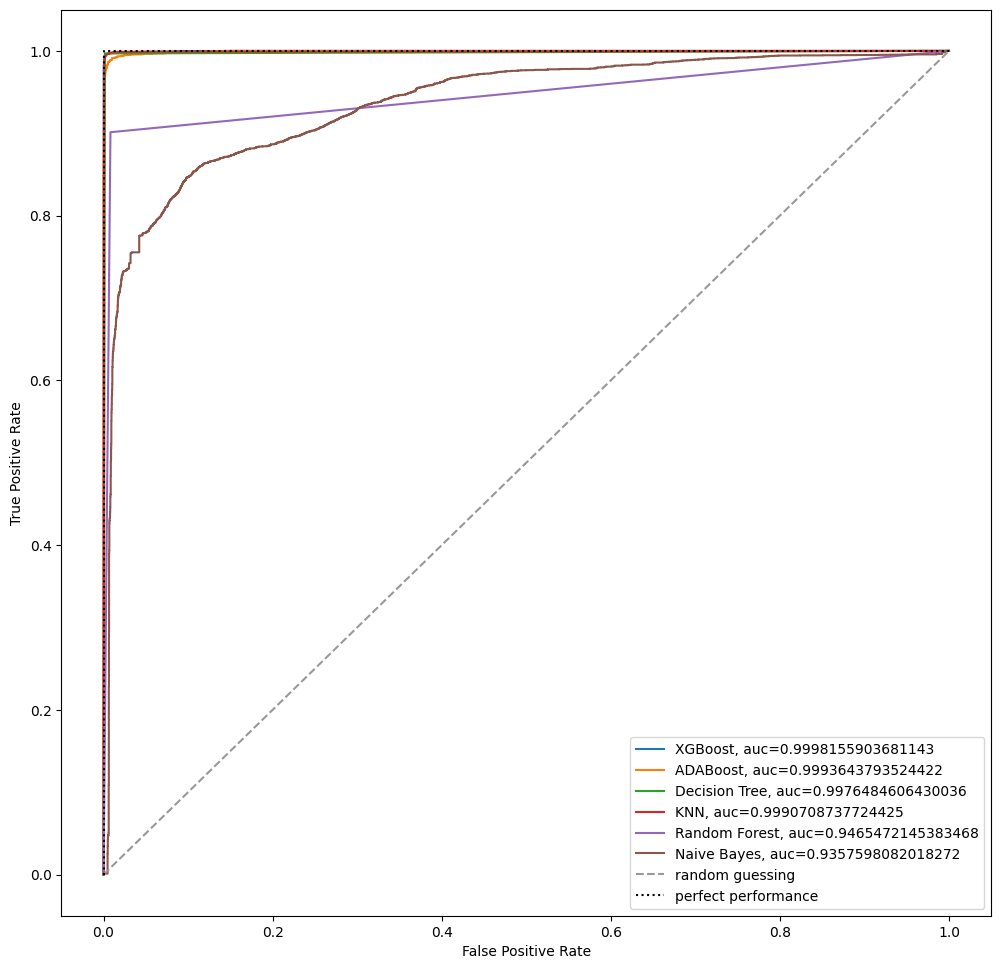

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics

plt.figure(figsize = (12,12))

fpr_xgb, tpr_xgb, thresh_xgb = metrics.roc_curve(Y_test, xgb_proba)
auc_xgb = metrics.roc_auc_score(Y_test, xgb_proba)
plt.plot(fpr_xgb,tpr_xgb,label="XGBoost, auc="+str(auc_xgb))

fpr_ada, tpr_ada, thresh_ada = metrics.roc_curve(Y_test, ada_proba)
auc_ada = metrics.roc_auc_score(Y_test, ada_proba)
plt.plot(fpr_ada,tpr_ada,label="ADABoost, auc="+str(auc_ada))


fpr_dt, tpr_dt, thresh_dt = metrics.roc_curve(Y_test, dt_proba)
auc_dt = metrics.roc_auc_score(Y_test, dt_proba)
plt.plot(fpr_dt,tpr_dt,label="Decision Tree, auc="+str(auc_dt))

fpr_knn, tpr_knn, thresh_knn = metrics.roc_curve(Y_test, knn_proba)
auc_knn = metrics.roc_auc_score(Y_test, knn_proba)
plt.plot(fpr_knn,tpr_knn,label="KNN, auc="+str(auc_knn))

fpr_rf, tpr_rf, thresh_rf = metrics.roc_curve(Y_test, rf_preds)
auc_rf = metrics.roc_auc_score(Y_test, rf_preds)
plt.plot(fpr_rf,tpr_rf,label="Random Forest, auc="+str(auc_rf))

fpr_nb, tpr_nb, thresh_nb = metrics.roc_curve(Y_test, nb_proba)
auc_nb = metrics.roc_auc_score(Y_test, nb_proba)
plt.plot(fpr_nb,tpr_nb,label="Naive Bayes, auc="+str(auc_nb))

#plt.plot([0,1], [0,1] , label="Y = X" , color ="black" , linestyle="--")

plt.plot([0, 1], [0, 1],
         linestyle = '--',
         color = (0.6, 0.6, 0.6),
         label = 'random guessing')
plt.plot([0, 0, 1], [0, 1, 1],
         linestyle = ':',
         color = 'black', 
         label = 'perfect performance')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.xlim([-0.002, 0.2]) 
plt.legend(loc=0)
plt.gcf().set_dpi(100)
plt.show()